Optical Spectroscopy
Goal:  
- to get acquainted with the principles of Optical (near infrared-visible-near ultraviotet) emission spectroscopy:
dispersive elements, light sources, calibration, processing of experimental data;  
- to calculate the value of one of the fundamental physical constants - Rydberg constant for Hydrogen
    

The laboratory includes four parts:
1. Determination of the diffraction grating constant
2. Measurement of the emission spectrum of Helium
3. Calibration of the prism - determination of refractive index
4. Measuring of the emission spectrum of Hydrogen

Part 1.  
Determination of the diffraction grating constant  
Registration the spactrum of mercury gas discharge lamp  
Calculation of the grating constant 

During the experiment three lines were observed and four scans were done


Formulas for grating  
Grating perpendicular to the incident beam
![formula3.png](formula3.png)
Minimum reflection angle
![formula3-1.png](formula3-1.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
print('Experimental data. Minimum reflection angle')
file_path='data01.txt'
data=pd.read_csv(file_path, delimiter='\t')
data

Experimental data. Minimum reflection angle


,N,color,theta1,theta2,theta3,theta4,lambda
0,1,violet,12.195,12.510,12.420,12.195,435.8328
1,2,green,15.795,15.950,15.950,15.795,546.0730
2,3,yellow,16.740,16.695,16.605,16.695,579.0660


In [3]:
measurements='''
violet 12.195 12.510 12.420 12.195 435.8328
green 15.795 15.950 15.950 15.795 546.073
yellow 16.740 16.695 16.605 16.695 579.066
'''

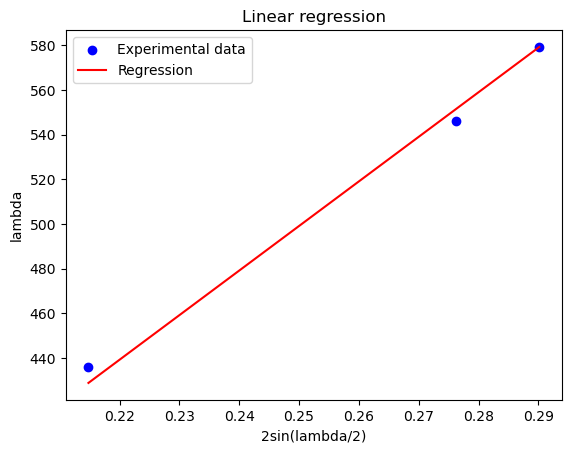

slop - Grating period by linear regression   1996.452129036148
Grating number of lines per mm  500.888543960622
Grating number of lines per inch 12722.569016599798


In [4]:
color,t1,t2,t3,t4,Hg = np.genfromtxt(measurements.splitlines()).T
x1=2*np.sin((t1+t2+t3+t4)/8/180*np.pi)
d1=Hg/(np.sin((t1+t2+t3+t4)/8/180*np.pi))/2
#liner gergession

numerator=np.sum(x1*Hg)
denominator=np.sum(x1**2)
slope = numerator / denominator
Hg_calc=x1*slope
plt.scatter(x1, Hg, color='blue', label='Experimental data')
plt.plot(x1, Hg_calc, color='red', label='Regression')
plt.xlabel('2sin(lambda/2)')
plt.ylabel('lambda')
plt.title('Linear regression')
plt.legend()
plt.show()

print("slop - Grating period by linear regression  ",slope)
print("Grating number of lines per mm ", 1000000/slope)
print("Grating number of lines per inch", 25400000/slope)

-----------------------------------------------------------------------------------------------------
Part 2.  
Emission spectrum of Helium measured with grating  
Eight bright lines were observed: four for n=1 and four for n=2 

In [5]:
file_path='data02.txt'
data=pd.read_csv(file_path, delimiter='\t')
data

,,,,Helium. First order peaks
N,color,theta1,theta2,theta
1,violet,7.765,7.785,7.775
2,blue,8.325,8.19,8.2575
3,green,8.775,8.775,8.775
4,yellow,10.305,10.308,10.3065


In [6]:
He1='''
7.765 7.785
8.325 8.19
8.775 8.775
10.305 10.308
'''

In [7]:
t11,t12= np.genfromtxt(He1.splitlines()).T
t10=(t11+t12)/2
He_lmbd1=3266.6667*np.sin(t10/180*np.pi)
print(t10)
print(He_lmbd1)

[ 7.775   8.2575  8.775  10.3065]
[441.92533433 469.16574648 498.3451159  584.45185776]


In [8]:
file_path='data03.txt'
data=pd.read_csv(file_path, delimiter='\t')
data

,,,,Helium. Second order peaks
N,color,theta1,theta2,theta
1,violet,15.885,15.795,15.84
2,blue,16.875,16.875,16.875
3,green,17.91,18.07,17.99
4,yellow,21.15,21.15,21.15


In [9]:
He2='''
15.885 15.795
16.875 16.875
17.91 18.07
21.15 21.15
''' 

In [10]:
t21,t22= np.genfromtxt(He2.splitlines()).T
t20=(t21+t22)/2
He_lmbd2=3266.6667*np.sin(t20/180*np.pi)/2
print(t10)
print(He_lmbd2)
He_lmbd=(He_lmbd1+He_lmbd2)/2
print(He_lmbd)

[ 7.775   8.2575  8.775  10.3065]
[445.82149923 474.13164435 504.45663684 589.32435594]
[443.87341678 471.64869542 501.40087637 586.88810685]


In [11]:
file_path='data04.txt'
data=pd.read_csv(file_path, delimiter='\t')
data

,,,,Calculated wavelength (nm)
N,color,first order,second order,averaged
1,violet,441.93,445.82,443.87
2,blue,469.17,474.13,471.65
3,green,498.35,504.46,501.40
4,yellow,584.45,589.32,586.89


Part 3.  
Determination of the prism diffraction index  



formula for prism
![formula5.png](formula5.png)

In [12]:
prizm ='''
50.625
50.04
49.545
48.465'''

In [13]:
alph= np.genfromtxt(prizm.splitlines()).T
print(alph)
n_prizm=2*np.sin((alph+60)/360*np.pi)
print(n_prizm)

[50.625 50.04  49.545 48.465]
[1.64453644 1.63870442 1.63373627 1.62279099]


In [14]:
file_path='data05.txt'
data=pd.read_csv(file_path, delimiter='\t')
data

,,,,,Helium. Diffraction angles with the prism
N,color,lambda,alfa,arg in rad,n
1,violet,443.87,50.6250,0.9654,1.6445
2,blue,471.65,50.0400,0.9603,1.6387
3,green,501.40,49.5450,0.9560,1.6337
4,yellow,586.89,48.4650,0.9465,1.6228


Lambda [443.87 471.65 501.4  586.89]
Refraction index [1.6445 1.6387 1.6337 1.6228]


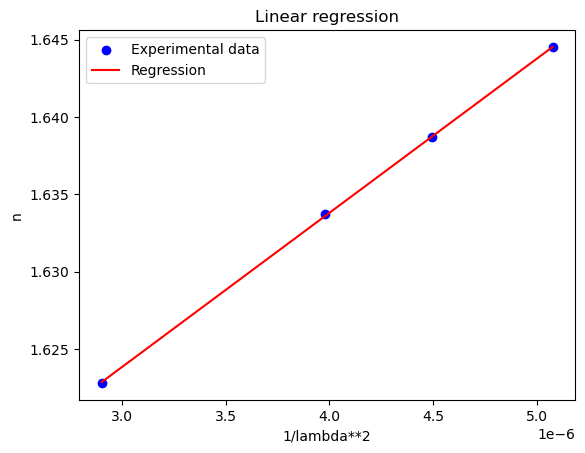

B=  1.593878217969837 C=  9979.835602101992


In [15]:
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    #coefficients
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    
    return slope, intercept


# Read data from data05.txt
filename = 'data05.txt'
_, _, lambd1, _, _,n = np.genfromtxt(filename, unpack=True, skip_header=2)
r_lambd1_2=1/lambd1**2
print("Lambda",lambd1)
print("Refraction index",n)

#liner gergession
slope, intercept = linear_regression(r_lambd1_2, n)
# Linear graph
n_pred =r_lambd1_2*slope+intercept

# Plot
plt.scatter(r_lambd1_2,n, color='blue', label='Experimental data')
plt.plot(r_lambd1_2,n_pred, color='red', label='Regression')
plt.xlabel('1/lambda**2')
plt.ylabel('n')
plt.title('Linear regression')
plt.legend()
plt.show()
print("B= ",intercept,"C= ",slope)


![formula4.png](formula4.png)

Part 4.  
Emission spectrum of Hydrogen  
Balmer series  
Rydberg constant

![formula7.png](formula7.png)

In [16]:
H='''
51.4
50.85
49.75
47.91'''

In [28]:
H_alph= np.genfromtxt(H.splitlines()).T
print(H_alph)
n_H=2*np.sin((60+H_alph)/360*np.pi)
print(n_H)
H_lmbd=np.sqrt((slope/(n_H-intercept)))
print(H_lmbd)
H_nu=299792458/H_lmbd*1e9
print(H_nu)
H_E=H_nu*4.14e-15
print(H_E)
N=[6,5,4,3]
N_pr=(np.float_(N))
term=0.25-1/N_pr**2
print(term)
Rydberg=1e9/H_lmbd/term
print(Rydberg)

[51.4  50.85 49.75 47.91]
[1.65219659 1.64676812 1.63579749 1.6171102 ]
[413.67473878 434.38550277 487.92695999 655.41831398]
[7.24705741e+14 6.90153000e+14 6.14420769e+14 4.57406288e+14]
[3.00028177 2.85723342 2.54370198 1.89366203]
[0.22222222 0.21       0.1875     0.13888889]
[10878111.66151378 10962393.38444434 10930597.75480992 10985350.64771796]


In [30]:
file_path='data06.txt'
data=pd.read_csv(file_path, delimiter='\t')
data

,,,,,,,,Balmer series
N,color,angle,n,lambda,nu,energy (eV),transition of n,Rydberg
1,violet,51.4,1.6522,413.66,7.2474E+14,3.000413,6→2,10878111.66
2,blue,50.85,1.6468,434.37,6.9018E+14,2.857359,5→2,10962393.38
3,cyan,49.75,1.6358,487.91,6.1445E+14,2.543815,4→2,10930597.75
4,red,47.91,1.6171,655.39,4.5743E+14,1.893750,3→2,10985350.65


Our everage value R=10939602.0  
R=10973731.568157(12) m−1 (Committee on Data of the International Science Council)